[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fisamz/Repositorio_MCDAA/blob/main/Tarea3/Tarea3.ipynb)

# Tarea 3 — Estadistica Descriptiva  
**Alumno:** Fisam Zavala  
**Dataset:** Mental Health and Lifestyle Habits (2019–2024)  
**Fuente:** [Kaggle – Atharva Soundankar](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


## Prueba de Normalidad (Shapiro-Wilk)

Para determinar si las variables numéricas siguen una distribución normal (paramétrica) o no, se aplicó la prueba de **Shapiro-Wilk**.

- Hipótesis nula (H₀): los datos provienen de una distribución normal.  
- Hipótesis alternativa (H₁): los datos no provienen de una distribución normal.

Con base en los valores de *p*, se clasificaron las variables como **paramétricas** (p > 0.05) o **no paramétricas** (p ≤ 0.05).


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

df = pd.read_csv("../Data/Mental_Health_Lifestyle_Dataset.csv")

# Seleccionamos solo las variables numéricas
vars_numericas = [
    "Sleep Hours",
    "Work Hours per Week",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Happiness Score"
]

# Aplicamos prueba de normalidad Shapiro-Wilk
resultados = {}
for var in vars_numericas:
    stat, p = shapiro(df[var])
    resultados[var] = p

normalidad = pd.DataFrame(resultados.items(), columns=["Variable", "p_value"])

# Clasificación según p-value
normalidad["Distribución"] = normalidad["p_value"].apply(lambda p: "Paramétrica (Normal)" if p > 0.05 else "No paramétrica (No normal)")

display(normalidad)


,Variable,p_value,Distribución
0,Sleep Hours,2.029275e-01,Paramétrica (Normal)
1,Work Hours per Week,5.101707e-30,No paramétrica (No normal)
2,Screen Time per Day (Hours),5.167517e-30,No paramétrica (No normal)
3,Social Interaction Score,1.597798e-28,No paramétrica (No normal)
4,Happiness Score,9.579464e-29,No paramétrica (No normal)


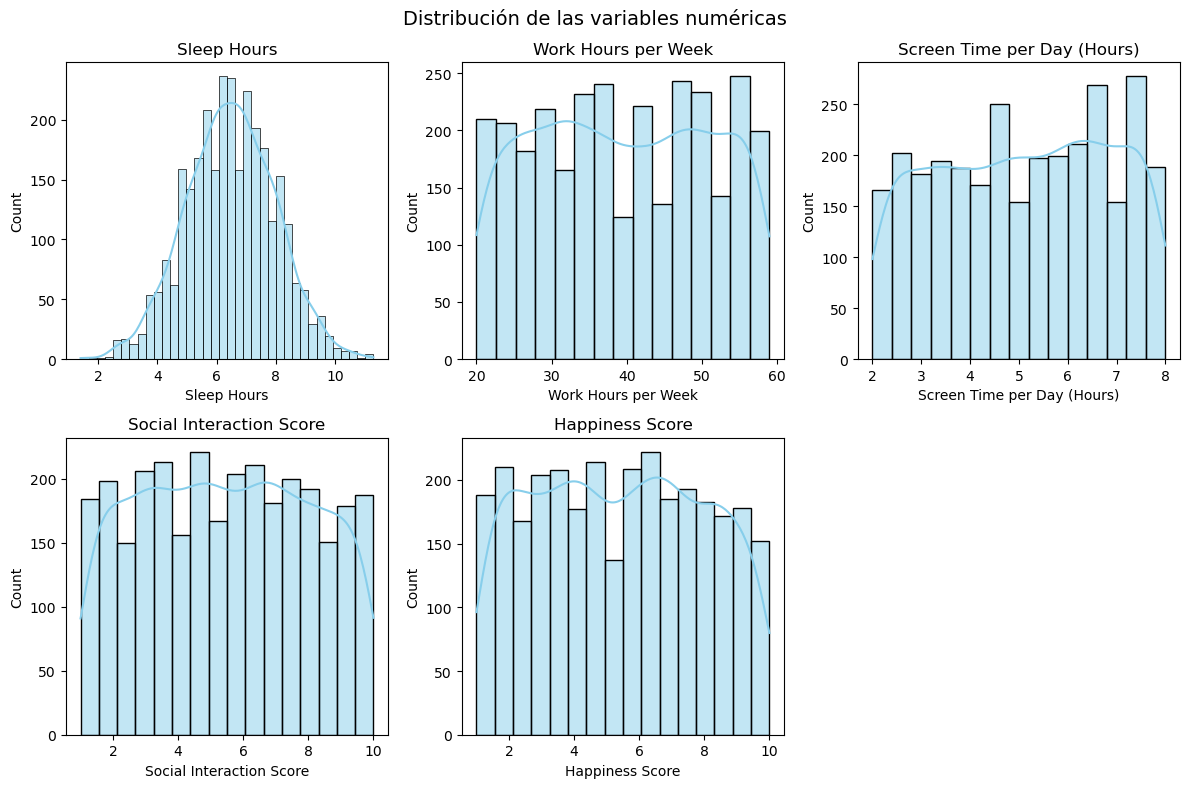

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(vars_numericas):
    sns.histplot(df[var], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(var)

for j in range(len(vars_numericas), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribución de las variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()


## Estadísticos descriptivos

Se calcularon las principales medidas de tendencia central y dispersión para las variables numéricas del conjunto de datos:

- **Media, Mediana y Moda:** describen el comportamiento central de las variables.
- **Varianza y Desviación estándar:** miden la dispersión respecto a la media.
- **Cuartiles (Q1 y Q3):** delimitan el rango intercuartílico, que contiene el 50% central de los datos.

Los resultados permiten observar la distribución y variabilidad de las variables relacionadas con los hábitos y la felicidad.

In [26]:
import pandas as pd
from scipy import stats

# Seleccionamos variables numéricas relevantes
vars_numericas = [
    "Sleep Hours",
    "Work Hours per Week",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Happiness Score"
]

resumen = pd.DataFrame(index=vars_numericas)

# Cálculos básicos
resumen["Media"] = df[vars_numericas].mean()
resumen["Mediana"] = df[vars_numericas].median()
resumen["Moda"] = [df[var].mode()[0] for var in vars_numericas]
resumen["Varianza"] = df[vars_numericas].var(ddof=1)
resumen["Desv. estándar"] = df[vars_numericas].std(ddof=1)
resumen["Q1 (25%)"] = df[vars_numericas].quantile(0.25)
resumen["Q3 (75%)"] = df[vars_numericas].quantile(0.75)

resumen = resumen.round(2)

display(resumen)


,Media,Mediana,Moda,Varianza,Desv. estándar,Q1 (25%),Q3 (75%)
Sleep Hours,6.48,6.5,6.6,2.25,1.50,5.5,7.5
Work Hours per Week,39.47,39.0,26.0,131.14,11.45,30.0,50.0
Screen Time per Day (Hours),5.09,5.1,6.7,3.05,1.75,3.6,6.6
Social Interaction Score,5.47,5.5,4.5,6.57,2.56,3.3,7.6
Happiness Score,5.40,5.4,2.9,6.54,2.56,3.2,7.5


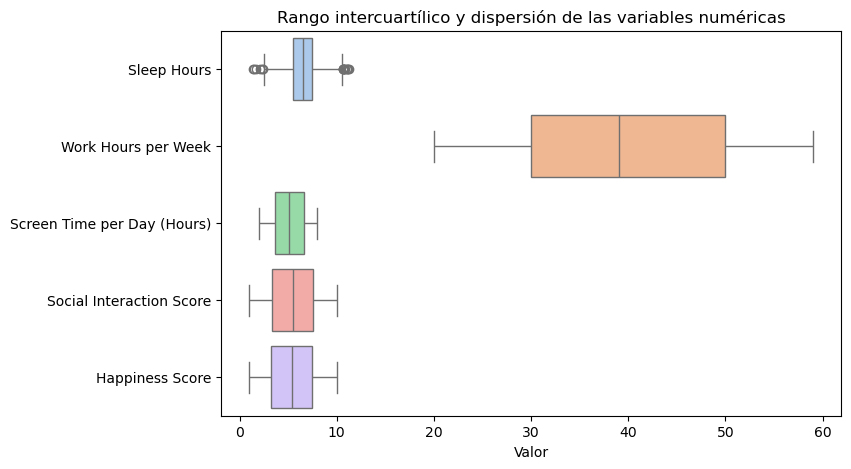

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df[vars_numericas], orient="h", palette="pastel")
plt.title("Rango intercuartílico y dispersión de las variables numéricas")
plt.xlabel("Valor")
plt.show()


## Matriz de correlación e interpretación

La matriz de correlación muestra la fuerza y dirección de la relación lineal entre las variables numéricas.  
Se utilizó el coeficiente de **Pearson (r)**, que toma valores entre -1 y 1:

- **r ≈ 1:** correlación positiva fuerte  
- **r ≈ -1:** correlación negativa fuerte  
- **r ≈ 0:** sin relación lineal significativa

,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
Sleep Hours,1.000,0.011,0.023,-0.005,0.017
Work Hours per Week,0.011,1.000,-0.020,0.015,0.011
Screen Time per Day (Hours),0.023,-0.020,1.000,0.006,0.017
Social Interaction Score,-0.005,0.015,0.006,1.000,-0.040
Happiness Score,0.017,0.011,0.017,-0.040,1.000


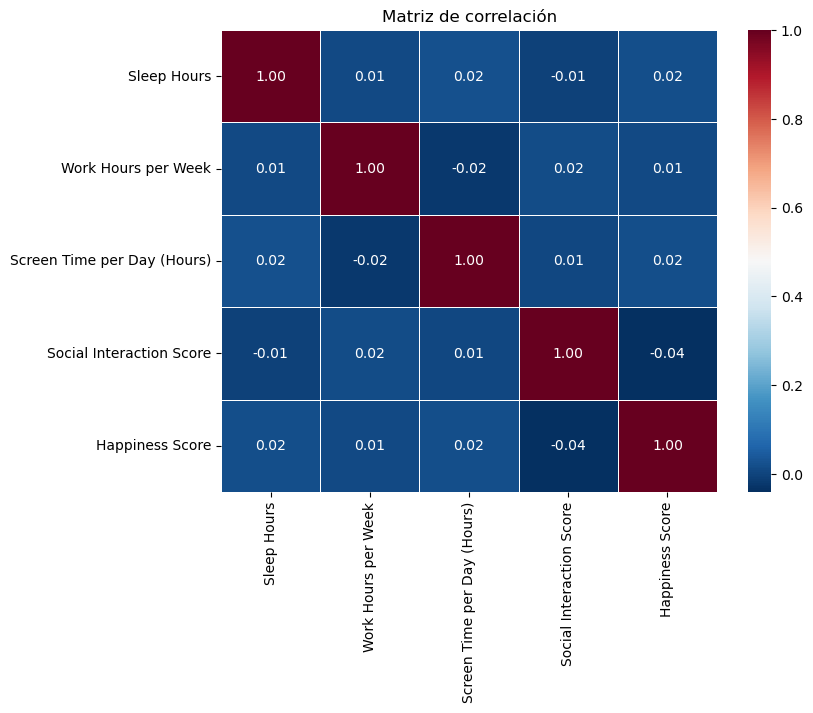

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables numéricas
vars_numericas = [
    "Sleep Hours",
    "Work Hours per Week",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Happiness Score"
]

# Matriz de correlación
corr_matrix = df[vars_numericas].corr(method="pearson")

display(corr_matrix.round(3))

# === Gráfico de correlación ===
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()


### Conclusiones de la matriz de correlación

- Las correlaciones entre las variables son **muy bajas (|r| < 0.05)**, lo que indica **ausencia de relaciones lineales fuertes** entre los factores analizados.  
- La relación entre **horas de sueño** y **felicidad** es **ligeramente positiva (r ≈ 0.017)**, pero tan débil que no se considera estadísticamente relevante.  
- **Interacción social** y **felicidad** presentan una correlación negativa mínima (r ≈ -0.04), sin evidencia de asociación significativa.  
- En general, **las variables parecen independientes entre sí**, lo que sugiere que la felicidad no depende linealmente de un solo factor, sino que podría verse influida por combinaciones o efectos no lineales.


### Prueba de hipótesis sobre las horas de sueño

**Objetivo:**  
Comprobar si la mayoría de las personas duermen **menos de 6 horas y media diarias en promedio**.

**Hipótesis:**
- H₀: μ ≥ 6.5 
- H₁: μ < 6.5  

Se aplica una **prueba t de una muestra**, asumiendo que la variable `Sleep Hours` sigue una distribución aproximadamente normal.

In [29]:
from scipy import stats

# Hipótesis:
# H0: La media de horas de sueño es igual o mayor a 6.5
# H1: La media de horas de sueño es menor a 6.5

# Parámetro de referencia
mu = 6.5

# Datos
sleep_data = df["Sleep Hours"].dropna()

# Prueba t de una muestra (unilateral)
t_stat, p_value = stats.ttest_1samp(sleep_data, mu)

# Prueba unilateral...
if t_stat < 0:
    p_value = p_value / 2
else:
    p_value = 1 - p_value / 2

print(f"Estadístico t: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"Media observada: {sleep_data.mean():.2f}")


Estadístico t: -0.879
p-value: 0.1898
Media observada: 6.48



**Conclusión:**
Dado que el valor p (0.1898) es **mayor que 0.05**, **no se rechaza la hipótesis nula (H₀)**.  
Por lo tanto, **no hay evidencia estadísticamente significativa** para afirmar que, en promedio, las personas duermen menos de 6.5 horas diarias.  

En otras palabras, los datos sugieren que la cantidad promedio de sueño se mantiene alrededor de las **6 a 7 horas por día**, lo cual es consistente con hábitos de descanso dentro del rango normal.
